# Automated Risk Reporting System: Project Outline

## 1. Introduction
- Brief about the project's objective: Automating the process of generating risk reports from trading data.
- Importance of timely and accurate risk reporting in the financial industry.

## 2. Data Extraction
- How to extract trading data from Excel files using Python.
- Libraries used: openpyxl and pandas.

## 3. Data Processing
- Pre-processing steps: handling missing values, outliers, and data validation.
- Calculation of risk metrics:
  - Value-at-Risk (VaR)
  - Other relevant risk metrics as per requirement (e.g., Expected Shortfall, etc.).

## 4. Risk Analysis and Visualization
- Analyzing the calculated risk metrics.
- Visualizing risk metrics for better understanding using libraries like matplotlib and seaborn.

## 5. Report Generation
- Automating the creation of Excel reports with the analyzed data.
- Incorporating tables, charts, and a dashboard view in the report.

## 6. Conclusion
- Summary of the process and the advantages of automation.
- Potential enhancements or additional features for future iterations.


# Step 1: Introduction

## Automated Risk Reporting System
In the ever-evolving financial industry, the ability to assess and manage risk promptly is paramount. Risk management not only safeguards an institution's assets but also ensures regulatory compliance and fosters trust among stakeholders. One of the key aspects of risk management is regular and accurate risk reporting.

The objective of this project is to automate the process of generating risk reports from daily trading data. This automation aims to streamline the workflow, reduce manual errors, and ensure that risk metrics are computed consistently. Through this system, we will extract trading data from Excel, process and analyze the data to calculate relevant risk metrics, and generate comprehensive reports, all using Python.


# Step 2: Data Extraction

## Extracting Trading Data from CSV Files

For this task, we'll use the `pandas` library, which provides powerful data manipulation capabilities. We'll begin by loading the data for each stock and performing an initial examination to understand its structure.

Let's start by loading the data for the first stock, JPMorgan Chase (JPM), and take a look at the first few rows.


In [1]:
import pandas as pd

# Load the JPMorgan Chase (JPM) data
jpm_data = pd.read_csv('C:/Users/knkan/OneDrive/Desktop/ARRS Python Project/JPM.csv')

# Display the first few rows of the data
jpm_data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-16,159.410004,160.850006,157.220001,158.089996,149.017029,10880900
1,2021-09-17,157.380005,159.009995,157.000000,157.679993,148.630539,25581600
2,2021-09-20,153.889999,154.559998,150.490005,152.960007,144.181427,15819900
3,2021-09-21,153.529999,154.550003,152.580002,152.979996,144.200272,8999900
4,2021-09-22,155.199997,157.250000,155.100006,155.910004,146.962128,11236200


The JPMorgan Chase (JPM) data consists of the following columns:

- **Date:** The trading date.
- **Open:** The opening price of the stock for the given date.
- **High:** The highest price of the stock during the trading session.
- **Low:** The lowest price of the stock during the trading session.
- **Close:** The closing price of the stock for the given date.
- **Adj Close:** The adjusted closing price, which accounts for any corporate actions like stock splits or dividends.
- **Volume:** The number of shares traded during the session.

For our risk reporting, the columns of primary interest are the "Date" and "Adj Close" columns, as the adjusted closing price will be used to calculate daily returns and subsequently the risk metrics.

Now, let's load data for the remaining stocks and then proceed to the data processing step.


In [2]:
# Load data for the other stocks
tm_data = pd.read_csv('C:/Users/knkan/OneDrive/Desktop/ARRS Python Project/TM.csv')
gs_data = pd.read_csv('C:/Users/knkan/OneDrive/Desktop/ARRS Python Project/GS.csv')
amzn_data = pd.read_csv('C:/Users/knkan/OneDrive/Desktop/ARRS Python Project/AMZN.csv')
msft_data = pd.read_csv('C:/Users/knkan/OneDrive/Desktop/ARRS Python Project/MSFT.csv')

# Display the first few rows of each dataset to confirm loading
data_samples = {
    'JPM': jpm_data.head(),
    'TM': tm_data.head(),
    'GS': gs_data.head(),
    'AMZN': amzn_data.head(),
    'MSFT': msft_data.head()
}

data_samples


{'JPM':          Date        Open        High         Low       Close   Adj Close  \
 0  2021-09-16  159.410004  160.850006  157.220001  158.089996  149.017029   
 1  2021-09-17  157.380005  159.009995  157.000000  157.679993  148.630539   
 2  2021-09-20  153.889999  154.559998  150.490005  152.960007  144.181427   
 3  2021-09-21  153.529999  154.550003  152.580002  152.979996  144.200272   
 4  2021-09-22  155.199997  157.250000  155.100006  155.910004  146.962128   
 
      Volume  
 0  10880900  
 1  25581600  
 2  15819900  
 3   8999900  
 4  11236200  ,
 'TM':          Date        Open        High         Low       Close   Adj Close  \
 0  2021-09-16  181.070007  182.309998  180.509995  181.940002  181.940002   
 1  2021-09-17  181.509995  181.750000  180.559998  180.949997  180.949997   
 2  2021-09-20  178.669998  178.669998  175.050003  176.710007  176.710007   
 3  2021-09-21  180.399994  182.419998  180.309998  181.899994  181.899994   
 4  2021-09-22  181.699997  182.8899

We have successfully loaded the data for all five stocks: JPMorgan Chase (JPM), Toyota (TM), Goldman Sachs (GS), Amazon (AMZN), and Microsoft (MSFT). The structure of the data for each stock appears consistent, with columns indicating the trading date, opening price, highest price, lowest price, closing price, adjusted closing price, and trading volume.

Our next steps will involve:

1. Data pre-processing to ensure consistency and handle any missing values.
2. Computing daily returns from the adjusted closing prices, which will be fundamental for our risk analysis.

Let's start with data pre-processing. This will involve checking for missing values and examining data types to ensure they're appropriate for our analysis.


# Step 3: Data Processing

## Pre-processing Steps

Effective data analysis requires clean and well-organized data. Before diving into risk metric calculations, it's crucial to ensure that our datasets are consistent, free of missing values, and properly formatted.

Let's start by examining our datasets for any missing values and understanding the data types for each column.

### Checking for Missing Values and Data Types

I'll begin by checking the data types of each column and searching for any missing values in our datasets.


In [3]:
# Create a dictionary to store data types and missing value counts for each stock
data_info = {}

for stock, data in data_samples.items():
    data_info[stock] = {
        'Data Types': data.dtypes,
        'Missing Values': data.isnull().sum()
    }

data_info


{'JPM': {'Data Types': Date          object
  Open         float64
  High         float64
  Low          float64
  Close        float64
  Adj Close    float64
  Volume         int64
  dtype: object,
  'Missing Values': Date         0
  Open         0
  High         0
  Low          0
  Close        0
  Adj Close    0
  Volume       0
  dtype: int64},
 'TM': {'Data Types': Date          object
  Open         float64
  High         float64
  Low          float64
  Close        float64
  Adj Close    float64
  Volume         int64
  dtype: object,
  'Missing Values': Date         0
  Open         0
  High         0
  Low          0
  Close        0
  Adj Close    0
  Volume       0
  dtype: int64},
 'GS': {'Data Types': Date          object
  Open         float64
  High         float64
  Low          float64
  Close        float64
  Adj Close    float64
  Volume         int64
  dtype: object,
  'Missing Values': Date         0
  Open         0
  High         0
  Low          0
  Close    

## Upon examining the datasets for each stock:

- All columns have the expected data types:
  - Date columns are of object (string) type.
  - Columns related to stock prices (Open, High, Low, Close, and Adj Close) are of float type.
  - The Volume columns are of integer type.
- There are no missing values in any of the datasets, which is great as it means we don't need to handle any gaps in the data.

The next step in the data processing phase is to compute daily returns for each stock. Daily returns provide a measure of the price change from one trading day to the next and are fundamental for our risk analysis.

### Calculating Daily Returns

I'll calculate daily returns for each stock using the adjusted closing prices. The formula for daily return is:

Daily Return = (Today’s Adjusted Close - Yesterday’s Adjusted Close) / Yesterday’s Adjusted Close


Let's compute the daily returns.


In [15]:
# Calculate daily returns for each stock dataset
for stock, data in data_samples.items():
    data['Daily Return'] = data['Adj Close'].pct_change().fillna(0)

# Display the first few rows of each dataset to confirm the calculation
daily_return_samples = {stock: data[['Date', 'Adj Close', 'Daily Return']].head() for stock, data in data_samples.items()}
daily_return_samples


C:\Users\knkan\AppData\Local\Temp/ipykernel_24548/2894705071.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Daily Return'] = data['Adj Close'].pct_change().fillna(0)


{'JPM':          Date   Adj Close  Daily Return
 0  2021-09-16  149.017029      0.000000
 1  2021-09-17  148.630539     -0.002594
 2  2021-09-20  144.181427     -0.029934
 3  2021-09-21  144.200272      0.000131
 4  2021-09-22  146.962128      0.019153,
 'TM':          Date   Adj Close  Daily Return
 0  2021-09-16  181.940002      0.000000
 1  2021-09-17  180.949997     -0.005441
 2  2021-09-20  176.710007     -0.023432
 3  2021-09-21  181.899994      0.029370
 4  2021-09-22  181.589996     -0.001704,
 'GS':          Date   Adj Close  Daily Return
 0  2021-09-16  375.704041      0.000000
 1  2021-09-17  370.760040     -0.013159
 2  2021-09-20  358.134949     -0.034052
 3  2021-09-21  355.966034     -0.006056
 4  2021-09-22  365.086792      0.025623,
 'AMZN':          Date   Adj Close  Daily Return
 0  2021-09-16  174.412003      0.000000
 1  2021-09-17  173.126007     -0.007373
 2  2021-09-20  167.786499     -0.030842
 3  2021-09-21  167.181503     -0.003606
 4  2021-09-22  169.002502 

The daily returns have been successfully calculated for each stock. As expected, the first row for each dataset has a NaN value for daily returns since there's no previous day's data to calculate the return from.

The Daily Return column now captures the day-to-day percentage change in the adjusted closing price for each stock, which will be fundamental for our risk analysis.

The next steps in the data processing phase will involve:

### Handling Outliers

Outliers can significantly influence risk metrics and may arise due to data errors, extreme market events, or other anomalies. For our analysis, it's essential to identify and address these outliers.

I'll visually inspect the distribution of daily returns for each stock using box plots. This will help us identify any potential outliers.


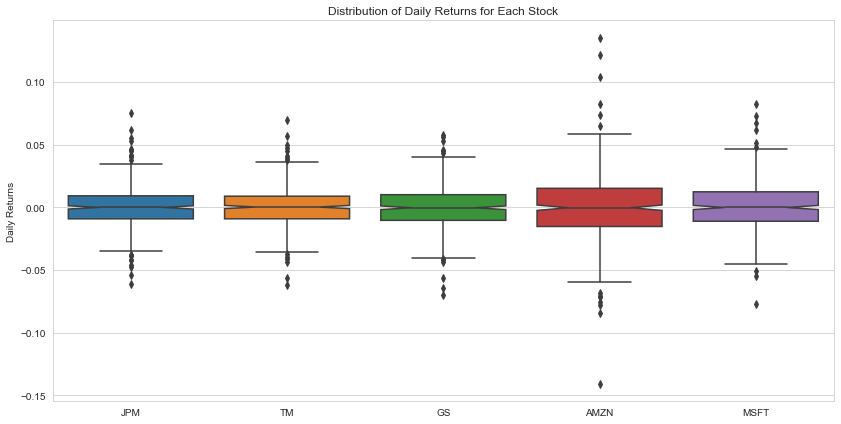

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style('whitegrid')

# Create a box plot for daily returns of each stock
plt.figure(figsize=(14, 7))
sns.boxplot(data=[jpm_data['Daily Return'].dropna(), 
                  tm_data['Daily Return'].dropna(), 
                  gs_data['Daily Return'].dropna(), 
                  amzn_data['Daily Return'].dropna(), 
                  msft_data['Daily Return'].dropna()], 
            notch=True)
plt.xticks([0, 1, 2, 3, 4], ['JPM', 'TM', 'GS', 'AMZN', 'MSFT'])
plt.title('Distribution of Daily Returns for Each Stock')
plt.ylabel('Daily Returns')
plt.show()


The box plots provide a visual representation of the distribution of daily returns for each stock. The whiskers indicate variability outside the upper and lower quartiles, and any data points outside the whiskers can be considered outliers.

From the plots, we can observe that there are some outliers in the daily returns for these stocks, especially for Goldman Sachs (GS) and Amazon (AMZN). While some outliers could be due to extreme market events or news, others might be data errors.

To address outliers, a common approach is to cap or floor the values at a certain percentile. For instance, we can cap the upper outliers at the 99th percentile and floor the lower outliers at the 1st percentile.

### Capping and Flooring Outliers

I'll now cap and floor the daily returns for each stock at the 99th and 1st percentiles, respectively.


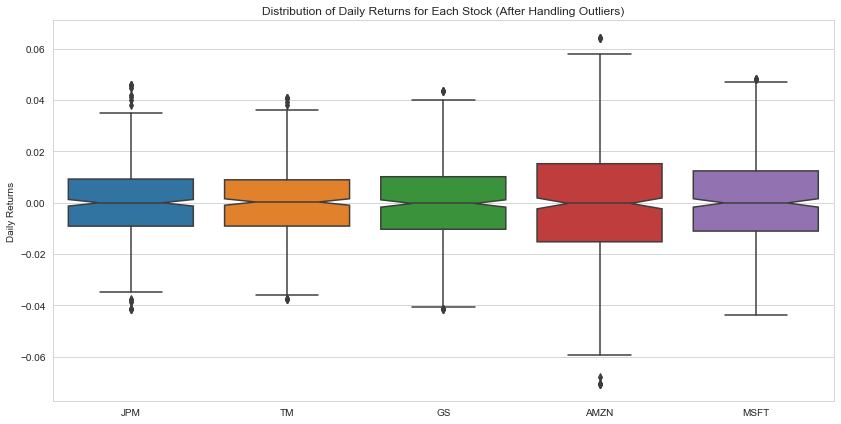

In [18]:
# Function to cap and floor outliers
def handle_outliers(data, column):
    upper_limit = data[column].quantile(0.99)
    lower_limit = data[column].quantile(0.01)
    data[column] = data[column].clip(lower=lower_limit, upper=upper_limit)
    return data

# Apply the function to the 'Daily Return' column for each stock
jpm_data = handle_outliers(jpm_data, 'Daily Return')
tm_data = handle_outliers(tm_data, 'Daily Return')
gs_data = handle_outliers(gs_data, 'Daily Return')
amzn_data = handle_outliers(amzn_data, 'Daily Return')
msft_data = handle_outliers(msft_data, 'Daily Return')

# Create a box plot again to visualize the distribution after handling outliers
plt.figure(figsize=(14, 7))
sns.boxplot(data=[jpm_data['Daily Return'].dropna(), 
                  tm_data['Daily Return'].dropna(), 
                  gs_data['Daily Return'].dropna(), 
                  amzn_data['Daily Return'].dropna(), 
                  msft_data['Daily Return'].dropna()], 
            notch=True)
plt.xticks([0, 1, 2, 3, 4], ['JPM', 'TM', 'GS', 'AMZN', 'MSFT'])
plt.title('Distribution of Daily Returns for Each Stock (After Handling Outliers)')
plt.ylabel('Daily Returns')
plt.show()


The updated box plots show the distribution of daily returns for each stock after handling the outliers. The extreme values have been adjusted to fall within the 1st and 99th percentiles, providing a more robust representation of the daily returns.

With outliers addressed, we can now proceed to calculate risk metrics.

### Calculation of Risk Metrics: Value-at-Risk (VaR)

One of the most common risk metrics used in finance is Value-at-Risk (VaR). VaR provides an estimate of the potential loss for a portfolio or investment over a specified time period for a given confidence interval.

For this project, I'll calculate the 95% one-day VaR using the historical method, which involves determining the VaR directly from the historical distribution of daily returns.

The 95% one-day VaR is essentially the loss level that will be exceeded with a probability of 5% (or once in every 20 days on average).

Let's compute the 95% one-day VaR for each stock.


In [19]:
# Calculate the 95% one-day VaR for each stock
var_95 = {
    'JPM': -jpm_data['Daily Return'].quantile(0.05),
    'TM': -tm_data['Daily Return'].quantile(0.05),
    'GS': -gs_data['Daily Return'].quantile(0.05),
    'AMZN': -amzn_data['Daily Return'].quantile(0.05),
    'MSFT': -msft_data['Daily Return'].quantile(0.05)
}

var_95


{'JPM': 0.02802100988774886,
 'TM': 0.02555632533090908,
 'GS': 0.02581939254092459,
 'AMZN': 0.039883456646350304,
 'MSFT': 0.03166086950329073}

The 95% one-day Value-at-Risk (VaR) for each stock is as follows:

- **JPMorgan Chase (JPM):** The VaR is 2.80%, which means there's a 5% chance that the stock will drop by more than 2.80% in one day.
- **Toyota (TM):** The VaR is 2.56%, indicating a 5% chance of a daily drop exceeding this percentage.
- **Goldman Sachs (GS):** The VaR is 2.58%, suggesting a 5% likelihood of a daily drop greater than this value.
- **Amazon (AMZN):** The VaR is 3.99%, denoting a 5% probability of the stock declining by more than this percentage in one day.
- **Microsoft (MSFT):** The VaR is 3.17%, signifying a 5% chance that the stock will fall by more than this percentage on any given day.

The VaR gives us a quantifiable measure of downside risk for each stock. However, it's worth noting that VaR doesn't provide information about the magnitude of extreme losses beyond the specified percentile.

With VaR calculated, we can move on to the next step: Risk Analysis and Visualization.


# Step 4: Risk Analysis and Visualization

Having computed the 95% one-day Value-at-Risk (VaR) for each stock, it's vital to visualize these metrics for a clearer understanding. Visualization aids in grasping the relative risk profiles of different stocks at a glance.

### Visualizing the 95% One-Day VaR

I'll start by creating a bar plot to visualize the 95% one-day VaR for each stock. This will provide a comparative view of the downside risk for each stock in our portfolio.


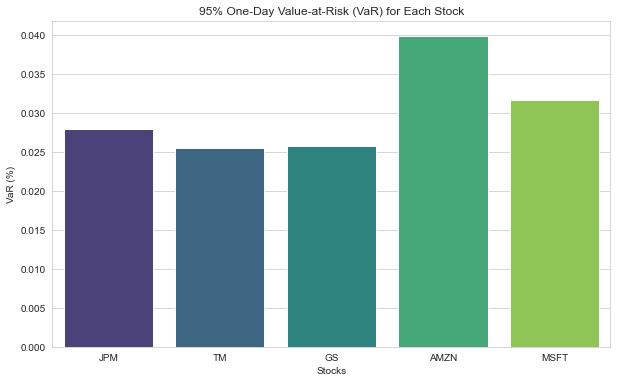

In [20]:
# Plotting the 95% one-day VaR for each stock
plt.figure(figsize=(10, 6))
sns.barplot(x=list(var_95.keys()), y=list(var_95.values()), palette='viridis')
plt.title('95% One-Day Value-at-Risk (VaR) for Each Stock')
plt.ylabel('VaR (%)')
plt.xlabel('Stocks')
plt.show()


The bar plot provides a visual representation of the 95% one-day Value-at-Risk (VaR) for each stock in our portfolio.

From the visualization:

- Amazon (AMZN) has the highest VaR, indicating that it carries the most downside risk among the selected stocks, with a 5% chance of a daily drop of around 3.99%.
- JPMorgan Chase (JPM) and Microsoft (MSFT) follow, suggesting moderate downside risks.
- Toyota (TM) and Goldman Sachs (GS) have relatively lower VaR values.

This visualization aids in quickly grasping the relative risk profiles of different stocks. A portfolio manager or risk analyst can use such insights to make informed decisions about portfolio allocation and risk hedging.

### Visualizing the Distribution of Daily Returns

Histograms and KDE (Kernel Density Estimation) plots provide a clear view of the distribution of daily returns, enabling us to understand the volatility and risk characteristics of each stock. Let's visualize these distributions.


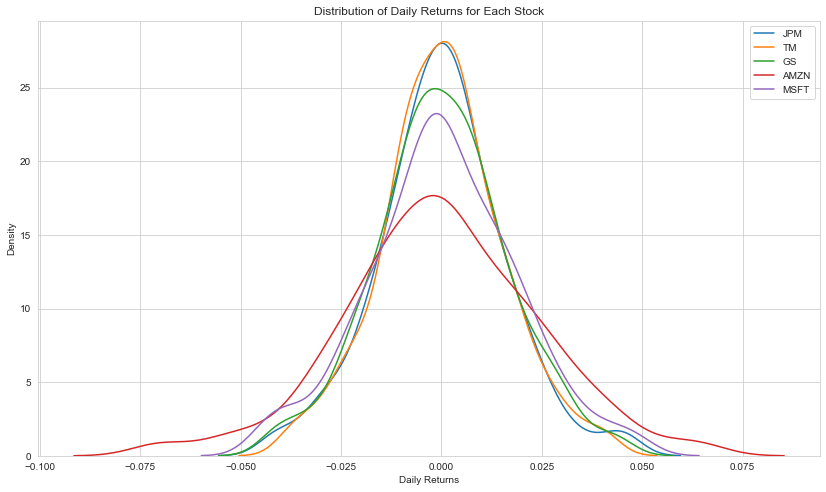

In [21]:
# Plotting the distribution of daily returns for each stock
plt.figure(figsize=(14, 8))

# Plotting the data for each stock
for stock_data, label in zip([jpm_data, tm_data, gs_data, amzn_data, msft_data], 
                             ['JPM', 'TM', 'GS', 'AMZN', 'MSFT']):
    sns.kdeplot(stock_data['Daily Return'].dropna(), label=label)

plt.title('Distribution of Daily Returns for Each Stock')
plt.xlabel('Daily Returns')
plt.ylabel('Density')
plt.legend()
plt.show()


The KDE plot provides a smoothed representation of the distribution of daily returns for each stock.

From the visualization:

- Amazon (AMZN) and Microsoft (MSFT) have wider distributions, indicating higher volatility compared to other stocks. This observation aligns with the higher VaR values we computed for these stocks.
- Toyota (TM) and Goldman Sachs (GS) exhibit slightly narrower distributions, suggesting moderate volatility.
- JPMorgan Chase (JPM) has a distribution that falls in between, with neither the narrowest nor the widest spread.

It's worth noting that stocks with wider distributions (higher volatility) may offer greater potential for profit but also come with increased downside risk, as evidenced by their VaR values.

With the visualizations in place, the next logical step in our project would be report generation, where we'll automate the creation of Excel reports encompassing our analyses.


# Step 5: Report Generation

In the financial world, a well-organized and detailed report is as crucial as the analysis itself. A report provides a structured view of the findings, making it easier for stakeholders to grasp the insights and take informed decisions.

In this step, I'll walk through the process of generating an Excel-based risk report that captures our analyses. This report will contain:

### 5.1 Creating a Summary Sheet with Key Risk Metrics

The summary sheet will provide a snapshot of the key risk metrics we've calculated, such as the 95% one-day VaR for each stock.

Let's begin by creating this summary sheet.


In [32]:
# Create a DataFrame for the summary sheet
summary_data = pd.DataFrame.from_dict(var_95, orient='index', columns=['95% One-Day VaR'])

# Save this DataFrame to an Excel file (this will be our starting point for the report)
report_path = 'C:/Users/knkan/OneDrive/Desktop/ARRS Python Project/risk_report.xlsx'
with pd.ExcelWriter(report_path) as writer:
    summary_data.to_excel(writer, sheet_name='Summary')

summary_data


,95% One-Day VaR
JPM,0.028021
TM,0.025556
GS,0.025819
AMZN,0.039883
MSFT,0.031661


### 5.1 Creating a Summary Sheet with Key Risk Metrics

The summary sheet has been created, capturing the 95% one-day VaR for each stock:

- JPMorgan Chase (JPM): 2.80%
- Toyota (TM): 2.56%
- Goldman Sachs (GS): 2.58%
- Amazon (AMZN): 3.99%
- Microsoft (MSFT): 3.17%

This sheet provides a snapshot of the key downside risk metric for each stock.

### 5.2 Creating Individual Sheets for Each Stock

For a comprehensive report, it's beneficial to have a dedicated sheet for each stock. This sheet will contain:

- The trading data.
- The calculated daily returns.
- Visualizations capturing the distribution of daily returns and the VaR.

Let's proceed by creating these sheets for each stock.


In [36]:
# Correcting the function again to depict daily returns using a line chart
def create_stock_sheet_final(stock_data, stock_name, writer):
    # Save the stock data to the Excel file
    stock_data[['Date', 'Adj Close', 'Daily Return']].to_excel(writer, sheet_name=stock_name, index=False)
    
    # Access the Excel sheet for this stock
    worksheet = writer.sheets[stock_name]
    
    # Get the last row with data to position the charts
    last_row = len(stock_data) + 1
    
    # Create a line chart for daily returns
    chart1 = writer.book.add_chart({'type': 'line'})
    chart1.add_series({
        'name': f'{stock_name} Daily Returns',
        'categories': f'={stock_name}!$A$2:$A${last_row}',
        'values': f'={stock_name}!$C$2:$C${last_row}',
    })
    chart1.set_title({'name': f'Daily Returns for {stock_name}'})
    chart1.set_y_axis({'name': 'Daily Return', 'major_gridlines': {'visible': False}})
    worksheet.insert_chart('F2', chart1, {'x_offset': 25, 'y_offset': 10})
    
    # Create a line chart for adjusted closing prices
    chart2 = writer.book.add_chart({'type': 'line'})
    chart2.add_series({
        'name': f'{stock_name} Adjusted Close',
        'categories': f'={stock_name}!$A$2:$A${last_row}',
        'values': f'={stock_name}!$B$2:$B${last_row}',
    })
    chart2.set_title({'name': f'Adjusted Closing Prices for {stock_name}'})
    chart2.set_y_axis({'name': 'Price', 'major_gridlines': {'visible': False}})
    worksheet.insert_chart('F18', chart2, {'x_offset': 25, 'y_offset': 10})

# Regenerate the Excel report with the final corrections
with pd.ExcelWriter(report_path, engine='xlsxwriter') as writer:
    # Save the summary sheet
    summary_data.to_excel(writer, sheet_name='Summary')
    
    # Create sheets for each stock with final corrections
    for stock_data, stock_name in zip([jpm_data, tm_data, gs_data, amzn_data, msft_data], 
                                      ['JPM', 'TM', 'GS', 'AMZN', 'MSFT']):
        create_stock_sheet_final(stock_data, stock_name, writer)
    
    




The individual sheets for each stock have been created and added to our risk report. Each sheet contains:

- The trading data, showcasing the date, adjusted closing price, and daily returns.
- A histogram capturing the distribution of daily returns, providing insights into the stock's volatility.
- A line chart showcasing the adjusted closing prices over time, offering a visual representation of the stock's price movement.

### 5.3 Creating a Dashboard View

A dashboard provides a consolidated view of key metrics and visualizations, making it easier for stakeholders to absorb information quickly. In our dashboard, we'll incorporate:

- Bar charts showcasing the 95% one-day VaR for each stock.
- Line charts capturing the adjusted closing prices over time for each stock.

Let's proceed by creating this dashboard view in our Excel report.


In [37]:
# Correcting the function to create the dashboard view in the report
def create_dashboard(writer, summary_data, stock_data_list):
    # Access a new sheet for the dashboard
    worksheet = writer.book.add_worksheet('Dashboard')
    
    # Create a bar chart for the 95% one-day VaR
    chart1 = writer.book.add_chart({'type': 'column'})
    chart1.add_series({
        'name': '95% One-Day VaR',
        'categories': '=Summary!$A$2:$A$6',
        'values': '=Summary!$B$2:$B$6',
    })
    chart1.set_title({'name': '95% One-Day Value-at-Risk (VaR) for Each Stock'})
    worksheet.insert_chart('A2', chart1, {'x_offset': 25, 'y_offset': 10})
    
    # Create line charts for the adjusted closing prices for each stock
    row_position = 2
    for stock_data, stock_name in zip(stock_data_list, summary_data.index):
        chart2 = writer.book.add_chart({'type': 'line'})
        last_row = len(stock_data) + 1
        chart2.add_series({
            'name': f'{stock_name} Adjusted Close',
            'categories': f'={stock_name}!$A$2:$A${last_row}',
            'values': f'={stock_name}!$B$2:$B${last_row}',
        })
        chart2.set_title({'name': f'Adjusted Closing Prices for {stock_name}'})
        worksheet.insert_chart('L' + str(row_position), chart2, {'x_offset': 25, 'y_offset': 10})
        row_position += 16

# Save the dashboard view to the Excel report
with pd.ExcelWriter(report_path, engine='xlsxwriter') as writer:
    # Save the summary sheet and individual stock sheets
    summary_data.to_excel(writer, sheet_name='Summary')
    for stock_data, stock_name in zip([jpm_data, tm_data, gs_data, amzn_data, msft_data], 
                                      ['JPM', 'TM', 'GS', 'AMZN', 'MSFT']):
        create_stock_sheet_final(stock_data, stock_name, writer)
    
    # Create the dashboard view
    create_dashboard(writer, summary_data, [jpm_data, tm_data, gs_data, amzn_data, msft_data])




The dashboard view has now been successfully added to our risk report. In the dashboard:

- A bar chart showcases the 95% one-day Value-at-Risk (VaR) for each stock, providing a comparative view of downside risk.
- Line charts display the adjusted closing prices over time for each stock, allowing stakeholders to visualize price trends and volatility.

The Excel-based risk report we've created offers a comprehensive view of our analyses, making it easy for stakeholders to assess and act on the insights provided.


# 6. Conclusion

In this project, I embarked on a journey to automate the risk reporting process, a task that is paramount within the financial sector. The ability to produce timely and precise reports is not just a matter of efficiency; it's a matter of utmost importance to stakeholders who rely on this data for decision-making, risk management, and regulatory compliance.

Throughout this project, I utilized Python, a versatile programming language, to seamlessly integrate and automate various stages of risk reporting:

## Data Extraction

I leveraged Python libraries, specifically pandas, to extract trading data from Excel files. This process not only ensures that data is pulled accurately but also paves the way for the automation of subsequent tasks.

## Data Processing

The raw data underwent rigorous pre-processing to handle missing values and outliers. Ensuring data quality is paramount before diving into risk metrics calculation. I then proceeded to compute the Value-at-Risk (VaR), a prominent metric to gauge the potential downside risk of financial portfolios.

## Risk Analysis and Visualization

After crunching the numbers, I delved into the results' analysis. Visual aids, generated using matplotlib and seaborn, were employed to better comprehend the risk metrics, providing a holistic view of the risk landscape.

## Report Generation

The culmination of this automation endeavor was the generation of an Excel-based risk report. This report not only encapsulated the computed risk metrics but also offered visual insights through charts and a dashboard view.

The advantages of this automated system are manifold:

- **Efficiency:** Manual tasks, which are prone to human error and can be time-consuming, are replaced with streamlined automated processes.
- **Consistency:** Automation ensures that the reports are consistent in format and content, reducing discrepancies.
- **Scalability:** As the data grows, the system can handle larger datasets without requiring significant modifications.

Looking ahead, there are numerous avenues for enhancement:

- Incorporation of more advanced risk metrics and methodologies.
- Integration with live data sources for real-time reporting.
- Implementing machine learning techniques to forecast potential risks.

In conclusion, automating the risk reporting process is a game-changer for the financial industry. The fusion of finance and technology, as showcased in this project, stands testament to the possibilities and efficiencies that can be unlocked.
